## Building an app that predicts the type of iris flower based on user input using a Random Forest Classifier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('iris (2).csv')

In [3]:
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
data.rename(columns={'sepal.length': 'sepallength', 'sepal.width': 'sepalwidth' ,'petal.length':'petallength', 'petal.width': 'petalwidth'})

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
#Converting the categorical columns to numerical

data['variety'] = data['variety'].map({'Setosa' : 0,
'Versicolor' : 1,
'Virginica': 2 })

In [8]:
#Extracting the features

X = data[['sepal.length', 'sepal.width', 'petal.length','petal.width']]
y = data['variety']

In [9]:
#Building the Random Forest Classifier.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [10]:
Y_pred = model.predict(X_test)

print(f'The accuracy for the test data : {metrics.accuracy_score(Y_pred, y_test)}')

The accuracy for the test data : 1.0


In [11]:
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [13]:
Y_pred_train = model.predict(X_train)

print(f'The accuracy for the training data : {metrics.accuracy_score(Y_pred_train, y_train)}')

The accuracy for the training data : 0.9833333333333333


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

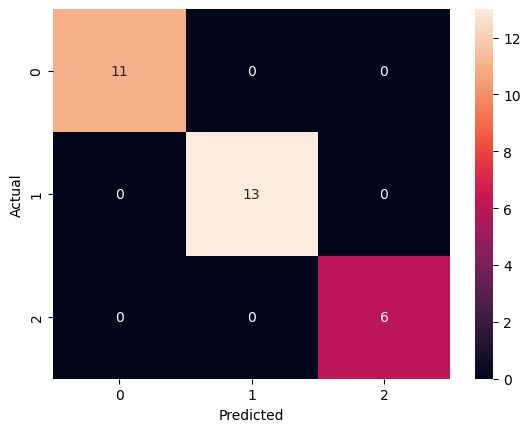

In [14]:
#Confusion Matrix

y_pred = model.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Persistence

In [16]:
from joblib import dump

dump(model, 'iris_model.joblib')

['iris_model.joblib']